# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

In [6]:
# read file2 as txt file
with open('file2', 'r') as f:
    file2 = f.read()

file2 = file2.split('\n')
file2 = file2[:15]
file2

['Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com',
 'Its american tradition bitch',
 "@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones",
 '" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"',
 "Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m",
 "@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.",
 'iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki',
 'RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!',
 "RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI",
 'Hey doll! Great I missed 

1.Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
1.Camping, in, Maine, for, the, weekend , ., Hey, Dad, ,, Mama, Loves, YOU, :, http://www.mamapalooza.com


2.Its american tradition bitch
2.Its, american, tradition, bitch


3.@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
3.@ThroughTheVoid, They, love, it, !, The, only, pleasure, they, get, in, life, ., I, actually, do, that, ., I'm, sure, I, hear, a, tiny, squeak, ..., Then, louder, ones
 

4." RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"
4.", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, !, Lol, <---, "" ,I , tweet, because, I\'m, happy, ,, I, tweet, because, I\'m, free, "", LOL, !, "
 

5.Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
5.Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammy's, done, it, aga, .., http://tinyurl.com/lb5p6m


6.@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
6.@dialloc, congrats, on, finding, your, way, over, ., it, may, be, slow, going, at, first, ., hang, in, there, ., it's, kinda, cool, when, u, get, up, to, speed, .


7.iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
7.iPhone, activation, delays, continue, ,, Apple, offers, $, 30, http://twt.gs/l3Ki


8.RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
8.RT, @GoogleAtWork, Gmail, maximum, attachment, size, now, 25, MB, http://bit.ly/62mjw, Nice, !!!


9.RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
9.RT, @acfou, The, Ads, Won, Awards, for, Crispin, ;, But, Did, Nothing, for, Client, BurgerKing's, Sales/Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI


10.Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
10.Hey, doll, !, Great, I, missed, True, Blood, yday, boo, lol, Rt, @FrankBanuat78, @jhillstephens, Hello, Sunshine, how, are, u, today, ?, :-)


11.Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
11.Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, ., http://www.last.fm/music/Pogo/Wonderland


12.@mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
12.@mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in, stock, to, those, that, just, walked, in, ., Can't, do, both


13.Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
13.Incoming, :, Frightened, Rabbit, ,, Sept., 22, (, Tucson, ), :, If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot, .., http://tinyurl.com/nz6xcv


14.Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
14.Hey, @ginoandfran, please, greet, philip, !, (, GinoandFran, live, >, http://ustre.am/2YyQ, )


15.Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
15.Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, ', corporate, ', taalgebruik, ..., Best, vreemd, eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [7]:
from typing import List
from tqdm import tqdm


class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.vocab = None
        # pairs_order - list of pairs of characters that were merged
        self.pairs_order: List[List[str]] = []

    def _add_spec_char(self, corpus: str):
        # function that adds special characters to the corpus to make it easier to tokenize
        # replace all spaces with '_'

        corpus = corpus.replace(' ', '_')
        # after each character in corpus[i] add a space
        corpus = ' '.join(corpus)
        corpus = corpus.split()

        return corpus

    def train(self, corpus: List[str]) -> None:
        # add special characters to the corpus
        new_corpus = []
        for text in corpus:
            new_corpus.append(self._add_spec_char(text))
        corpus = new_corpus

        # add to vocab all unique characters from corpus
        vocab = set()
        for text in corpus:
            for char in text:
                vocab.add(char)
        vocab = list(vocab)
        vocab.sort()
        self.vocab = vocab

        z = 0
        while len(self.vocab) < self.vocab_size:
            # find the most frequent pair of characters in corpus
            freqs = {}

            for text in corpus:
                if len(text) > 1:
                    # text - array of strings
                    for i in range(len(text) - 1):
                        if text[i] != '_':
                            pair = text[i] + text[i + 1]
                            if pair in freqs:
                                freqs[pair] = [freqs[pair][0] + 1, text[i], text[i + 1]]
                            else:
                                freqs[pair] = [1, text[i], text[i + 1]]

            if len(freqs) == 0:
                break

            # find the most frequent pair
            max_freq = 0
            pair = ''
            max_value = None
            for key in freqs:
                if freqs[key][0] > max_freq:
                    max_freq = freqs[key][0]
                    pair = key
                    max_value = freqs[key]

            self.pairs_order.append([max_value[1], max_value[2]])

            #add the pair to vocab
            self.vocab.append(pair)

            # merge the pair in corpus
            # replace all pairs in corpus with the new pair
            for text in corpus:
                for i in range(len(text) - 1):
                    if text[i] + text[i + 1] == pair:
                        text[i] = pair
                        text[i + 1] = ''
                while '' in text:
                    text.remove('')

        z += 1

    def tokenize(self, text: str) -> List[str]:
        # add special characters to the text
        text = self._add_spec_char(text)

        # tokenize the text
        # replace all pairs in text with the new pair
        # remove all empty strings from text
        for pair in self.pairs_order:
            for i in range(len(text) - 1):
                if text[i] + text[i + 1] == pair[0] + pair[1]:
                    text[i] = pair[0] + pair[1]
                    text[i + 1] = ''
            while '' in text:
                text.remove('')

        return text



In [8]:
text_corpus = ['low', 'lower', 'newest', 'widest', 'widely', 'dogs', 'cats', 'happily', 'flying', 'quickly', 'running',
               'was', 'i', 'am', 'disgusting', 'disgustingly', 'disgusted', 'disgust', 'disgusts', 'disgustable',
               'disgustables', 'disgustably', 'disgustfulness', 'disgustfulness,']
bpe_tokenizer = BPETokenizer(30)
bpe_tokenizer.train(text_corpus)

print(bpe_tokenizer.tokenize('disgusting'))
print(bpe_tokenizer.tokenize('disgustingly'))
print(bpe_tokenizer.tokenize('newest'))

['disgust', 'i', 'n', 'g']
['disgust', 'i', 'n', 'g', 'ly']
['n', 'e', 'w', 'e', 'st']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [9]:
# read all files as txt files
text_corpus = []
for i in range(1, 6):
    with open('file' + str(i), 'r') as f:
        text_corpus += f.read().split('\n')

text_corpus[:5]

['@anitapuspasari waduh..',
 '" Could journos please stop putting the word ""gate"" after everything they write... gate."',
 "20% More Ridiculous Sale @20x200 ends tonight! - get 20% off by entering 'RIDONK' at checkout. More info: http://bit.ly/ridonktues",
 "@Studio85 I have a pair of those shoes. They are comfy. Like being barefoot. Okay for running, but not on concrete, as I've discovered.",
 'RT @twilightus Team Carlisle is a Trending Topic- help him out RT Follow @peterfacinelli see a grown man n a bikini dance Hollywood Blvd']

In [15]:
sizes = [250, 500, 750, 1000, 1500, 2000]
avg_len = []
tokenized_corpuses = []
for size in tqdm(sizes):
    bpe_tokenizer = BPETokenizer(size)
    bpe_tokenizer.train(text_corpus)

    lens = []
    cor_tok = []
    for text in text_corpus:
        tokenized = bpe_tokenizer.tokenize(text)
        lens.append(len(tokenized))
        cor_tok.append(tokenized)
    avg_len.append(sum(lens) / len(lens))
    tokenized_corpuses.append(cor_tok)

100%|██████████| 6/6 [01:30<00:00, 15.11s/it]


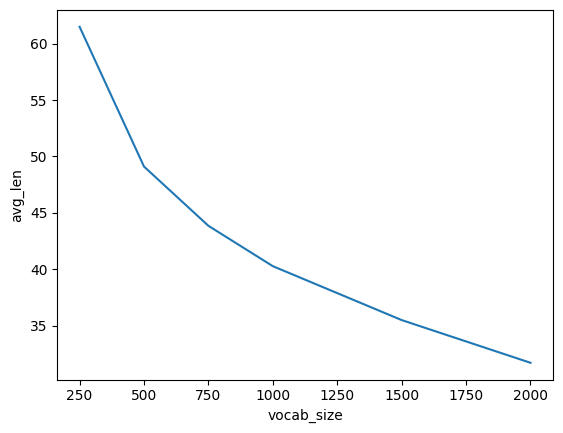

In [16]:
import matplotlib.pyplot as plt

plt.plot(sizes, avg_len)
plt.xlabel('vocab_size')
plt.ylabel('avg_len')
plt.show()

In [17]:
avg_len

[61.48444444444444,
 49.10666666666667,
 43.85777777777778,
 40.284444444444446,
 35.51111111111111,
 31.72888888888889]

In [18]:
tokenized_corpuses[5][:3]

[['@anitapuspasari_waduh..'],
 ['"_Could_journos_please_stop_putting_the_word_""gate""_after_everything_they_write..._gate."'],
 ["20%_More_Ridiculous_Sale_@20x200_ends_tonight!_-_get_20%_off_by_entering_'RIDONK'_at_checkout._More_info:_http://bit.ly/ridonktues"]]

 Vocabulary Size:

A larger vocabulary size allows for more distinct tokens, potentially capturing more nuanced semantics in the data.
However, a larger vocabulary size also means more parameters in your model, which could lead to longer training times and increased memory requirements.
Tokenization Efficiency:

Smaller vocabularies might lead to more aggressive subword tokenization, resulting in shorter token sequences.
This could potentially improve efficiency in terms of model training and inference time, as well as reduce the memory footprint of the model.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('Translated Wikipedia Biographies - EN_DE.csv')

In [21]:
df.head()

,sourceLanguage,targetLanguage,documentID,stringID,sourceText,translatedText,perceivedGender,entityName,sourceURL
0,en,de,1,1-1,Kaisa-Leena Mäkäräinen (born 11 January 1983) ...,Kaisa-Leena Mäkäräinen (geboren am 11. Januar ...,Female,Kaisa Mäkäräinen,https://en.wikipedia.org/wiki/Kaisa_M%C3%A4k%C...
1,en,de,1,1-2,"Outside sports, Mäkäräinen is currently studyi...",Neben dem Sport studiert Mäkäräinen derzeit Ph...,Female,Kaisa Mäkäräinen,https://en.wikipedia.org/wiki/Kaisa_M%C3%A4k%C...
2,en,de,1,1-3,"Her team coach is Jonne Kähkönen, while Jarmo ...","Ihr Mannschaftstrainer ist Jonne Kähkönen, Jar...",Female,Kaisa Mäkäräinen,https://en.wikipedia.org/wiki/Kaisa_M%C3%A4k%C...
3,en,de,1,1-4,Mäkäräinen was originally a cross-country skie...,Mäkäräinen war ursprünglich Langläuferin und k...,Female,Kaisa Mäkäräinen,https://en.wikipedia.org/wiki/Kaisa_M%C3%A4k%C...
4,en,de,1,1-5,She started training for the biathlon in 2003.,Mit dem Biathlontraining begann sie 2003.,Female,Kaisa Mäkäräinen,https://en.wikipedia.org/wiki/Kaisa_M%C3%A4k%C...


In [22]:
# take only translated texts and create a text corpus
text_corpus = df['translatedText'].tolist()
text_corpus[0]

'Kaisa-Leena Mäkäräinen (geboren am 11. Januar 1983) ist eine ehemalige Weltmeisterin und 3-malige Weltcup-Siegerin im Biathlon aus Finnland, die derzeit für Kontiolahden Urheilijat antritt.'

In [23]:
# test the BPE tokenizer on the dataset
sizes = [250, 500, 750, 1000, 1500, 2000, 3000]

In [24]:
avg_len = []
tokenized_corpuses = []
for size in tqdm(sizes):
    bpe_tokenizer = BPETokenizer(size)
    bpe_tokenizer.train(text_corpus)

    lens = []
    cor_tok = []
    for text in text_corpus:
        tokenized = bpe_tokenizer.tokenize(text)
        lens.append(len(tokenized))
        cor_tok.append(tokenized)
    avg_len.append(sum(lens) / len(lens))
    tokenized_corpuses.append(cor_tok)

100%|██████████| 7/7 [12:53<00:00, 110.55s/it]


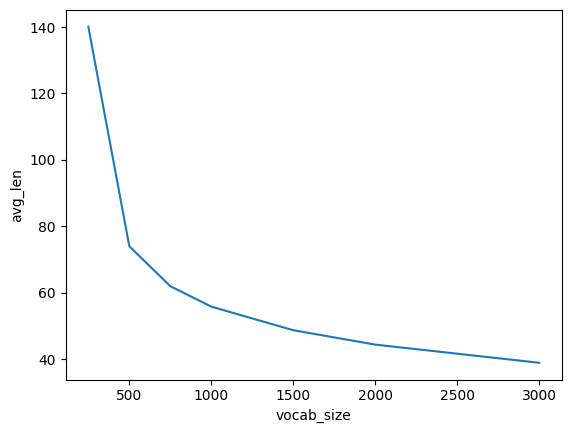

In [25]:
import matplotlib.pyplot as plt

plt.plot(sizes, avg_len)
plt.xlabel('vocab_size')
plt.ylabel('avg_len')
plt.show()

In [26]:
print(tokenized_corpuses[5][:3])

[['K', 'a', 'is', 'a-', 'Le', 'en', 'a_M', 'ä', 'k', 'ä', 'rä', 'in', 'en_', '(geboren_am_1', '1._', 'Januar_', '198', '3', ')_ist_eine_', 'ehem', 'alige_', 'Welt', 'm', 'eist', 'erin_und_', '3', '-m', 'alige_', 'Welt', 'c', 'u', 'p', '-', 'Si', 'eg', 'erin_', 'im_', 'Bi', 'ath', 'l', 'on_', 'aus_', 'Fin', 'n', 'land', ',_die_', 'derzeit_', 'für_', 'Kon', 'ti', 'ol', 'ah', 'den_', 'U', 'r', 'hei', 'li', 'j', 'at_', 'ant', 'rit', 't.'], ['N', 'eb', 'en_', 'dem_', 'Sp', 'ort_', 'studier', 't_', 'M', 'ä', 'k', 'ä', 'rä', 'in', 'en_', 'derzeit_', 'Ph', 'y', 'si', 'k_', 'auf_', 'Lehr', 'am', 't_', 'an_der_Universität_', 'O', 'st', 'f', 'inn', 'land_', 'in_', 'J', 'o', 'ens', 'u', 'u', '.'], ['Ihr_', 'M', 'ann', 'schaft', 'st', 'rain', 'er_', 'ist_', 'J', 'onn', 'e_', 'K', 'äh', 'k', 'ön', 'en,_', 'J', 'ar', 'm', 'o_', 'P', 'unk', 'k', 'in', 'en_', 'ist_', 'ihr_', 'S', 'k', 'it', 'rain', 'er.']]


### Conclusion
The average length of the tokenized sentence differs from the average length of the tokenized tweet because tweets are typically shorter, often containing emojis, hashtags, and abbreviations as single tokens. Additionally, tokenizers handle special characters and URLs differently, affecting tokenization patterns. These factors contribute to differences in average token length between tokenized sentences and tokenized tweets.